# Phân tích tai nạn giao thông tại UK (2014 - 2019)

In [25]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run decision tree
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Add num label for categorical variable
from sklearn.metrics import classification_report, confusion_matrix # kiểm định

In [2]:
df = pd.read_csv('../Data/afterPreprocess.csv')
df.head(2)

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,140000717,429427,433921,2,2014-01-01,14:15:00,A(M),Dry,Daylight: Street lights present,Fine without high winds,Car,Passenger,Slight,Male,28
1,140012302,430481,433453,1,2014-01-01,00:05:00,Unclassified,Dry,Darkness: Street lights present and lit,Fine without high winds,Taxi/Private hire car,Passenger,Slight,Male,29


## Phân tích mô tả

In [3]:
# hàm bổ trợ
def makeXAxis(start, step, end):
  x_axis = []
  pre = start
  while True:
    next = pre + step
    if next > end:
      next = end
    x_axis.append((pre, next))
    pre += step
    if pre >= end:
      break
  return x_axis

def makeYAxis(s, x_axis):
  y_axis_values = {}
  for i in x_axis:
    y_axis_values[i] = []

  for i in s:
    for j in x_axis:
      if j[1] == x_axis[-1][1]:
        if i >= j[0] and i <= j[1]:
          y_axis_values[j].append(i)
      elif i >= j[0] and i < j[1]:
        y_axis_values[j].append(i)

  y_axis = []
  for i in x_axis:
    y_axis.append(len(y_axis_values[i]))
  return y_axis

def draw(x_axis, y_axis, title, x_label, y_label, size, rotation=45, barh=False):
  plt.figure(figsize=size)
  plt.xticks(rotation = rotation)
  if barh:
      plt.barh([str(i) for i in x_axis], y_axis)
  else:
      plt.bar([str(i) for i in x_axis], y_axis)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

**Loại phương tiện gây tai nạn nhiều nhất**
- Thống kê các loại xe gây tai nạn cho thấy xe hơi là loại xe gây tai nạn phổ biến nhất
- Theo sau đó là xe đạp, xe bus 17 chỗ, taxi, các loại xe moto

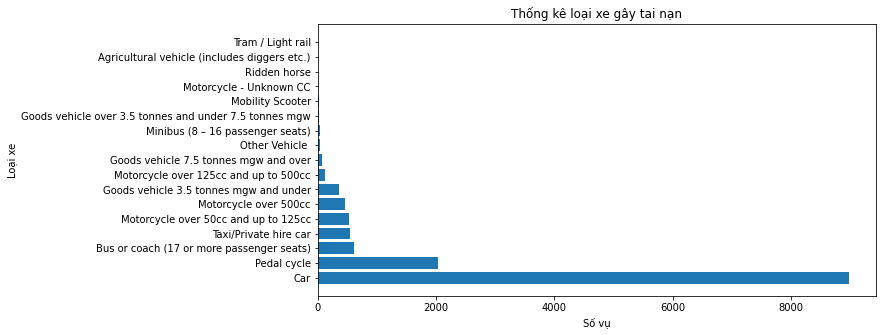

In [4]:
typeVehicle = df['Type of Vehicle'].value_counts()
draw(typeVehicle.index, typeVehicle.values, y_label='Loại xe', x_label='Số vụ', title='Thống kê loại xe gây tai nạn', rotation=0, barh=True, size=(10,5))

**Kiểu thời tiết phổ biến khi xảy ra tai nạn**
- Khi xảy ra tai nạn, kiểu thời tiết "Thời tiết tốt và không có gió to" là phổ biến nhất
- Tiếp theo đó là các loại thời tiết: "Trời mưa không gió", "Trời mưa và có gió to", không xác định

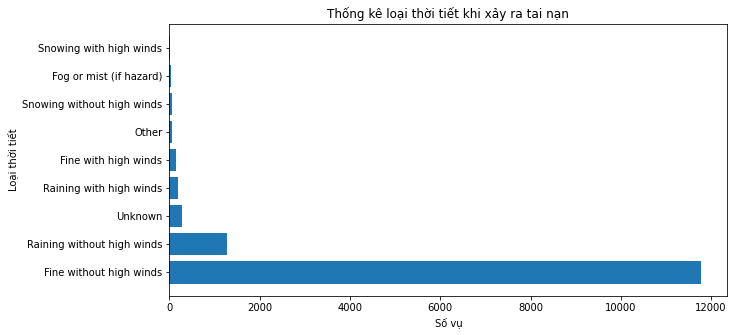

In [5]:
weatherCond = df['Weather Conditions'].value_counts()
draw(weatherCond.index, weatherCond.values, y_label='Loại thời tiết', x_label='Số vụ', title='Thống kê loại thời tiết khi xảy ra tai nạn', rotation=0, barh=True, size=(10,5))

**Xu hướng tai nạn**


Text(126.125, 0.5, 'Số lượng')

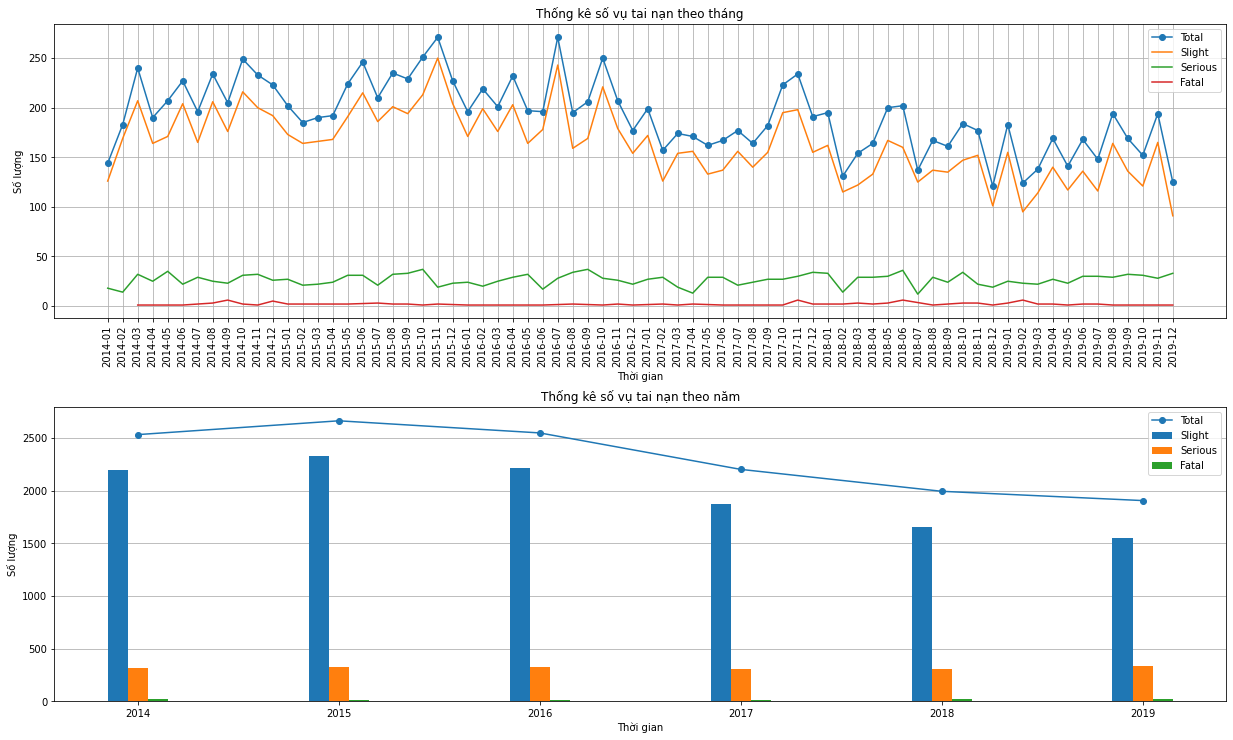

In [6]:
# tổng hợp số vụ theo tháng và vẽ bằng line chart rồi nhận xét
month = df['Accident Date'].apply(lambda x: x[:-3])
year = df['Accident Date'].apply(lambda x: x[:4])

monthCount = month.value_counts().sort_index()
yearCount = year.value_counts().sort_index()
width = 0.1

fatal = dict(df[df['Casualty Severity']=='Fatal']['Casualty Severity'].groupby([year]).count())
serious = dict(df[df['Casualty Severity']=='Serious']['Casualty Severity'].groupby([year]).count())
slight = dict(df[df['Casualty Severity']=='Slight']['Casualty Severity'].groupby([year]).count())

fatal1 = dict(df[df['Casualty Severity']=='Fatal']['Casualty Severity'].groupby([month]).count())
serious1 = dict(df[df['Casualty Severity']=='Serious']['Casualty Severity'].groupby([month]).count())
slight1 = dict(df[df['Casualty Severity']=='Slight']['Casualty Severity'].groupby([month]).count())

fig, axs = plt.subplots(2,1, figsize=(17,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

axs[0].set_xticklabels(monthCount.index, rotation=90)
axs[0].plot(monthCount.index, monthCount.values, '-o', label='Total')
axs[0].plot(list(slight1.keys()), list(slight1.values()), label='Slight')
axs[0].plot(list(serious1.keys()), list(serious1.values()), label='Serious')
axs[0].plot(list(fatal1.keys()), list(fatal1.values()), label='Fatal')
axs[0].grid(b=True)
axs[0].legend()
axs[0].set_title('Thống kê số vụ tai nạn theo tháng')
axs[0].set_xlabel('Thời gian')
axs[0].set_ylabel('Số lượng')

x = np.arange(len(year.value_counts()))
axs[1].bar(x-width, slight.values(), width, label='Slight', zorder=3)
axs[1].bar(x, serious.values(), width, label='Serious', zorder=3)
axs[1].bar(x+width, fatal.values(), width, label='Fatal', zorder=3)
axs[1].set_xticklabels(yearCount.index, rotation=0)
axs[1].legend()
axs[1].grid(b=True, axis='y', zorder=0)
axs[1].plot(yearCount.index, yearCount.values, '-o', label='Total')
axs[1].legend()
axs[1].set_title('Thống kê số vụ tai nạn theo năm')
axs[1].set_xlabel('Thời gian')
axs[1].set_ylabel('Số lượng')

- Từ năm 2014 đến năm 2019, số lượng tai nạn giảm dần. Chứng tỏ sự phát triển ngày càng tiến bộ trong lĩnh vực quản lý giao thông. Tuy nhiên, số tai nạn nghiêm trọng và số ca tử vong gần như giữ nguyên theo từng năm.
- Trong thống kê dưới đây, có một vài khoảng thời gian trong năm, số lượng vụ tai nạn biến động một cách bất thường so với các khoảng thời gian còn lại:
    - Tháng 12, 1: Đây thời gian diễn ra Giáng Sinh và tết Dương lịch, đây là khoảng thời gian nghỉ lễ của gia đình sau một năm làm việc. Do đó, Tai nạn thường giảm vào khoảng thời gian này.
    - Từ tháng 5 đến tháng 8 là khoảng thời gian hè, mọi người có xu hướng đi du lịch hoặc nghỉ ngơi ở nhà. Do đó số lượng vụ tai nạn giao thông biến động mạnh trong thời gian này.
    - Tháng 10, 11: Đây là nơi diễn ra 2 ngày lễ lớn của UK là Quốc Khánh và Lễ Tạ ơn, người ta có xu hướng sẽ đi du lịch hoặc trở về từ thành phố cùng gia đình. Do đó số lượng tai nạn tăng lên.
- Các khoảng thời gian còn lại, số lượng tai nạn biến động nhẹ.

**Vị trí các vụ tai nạn**

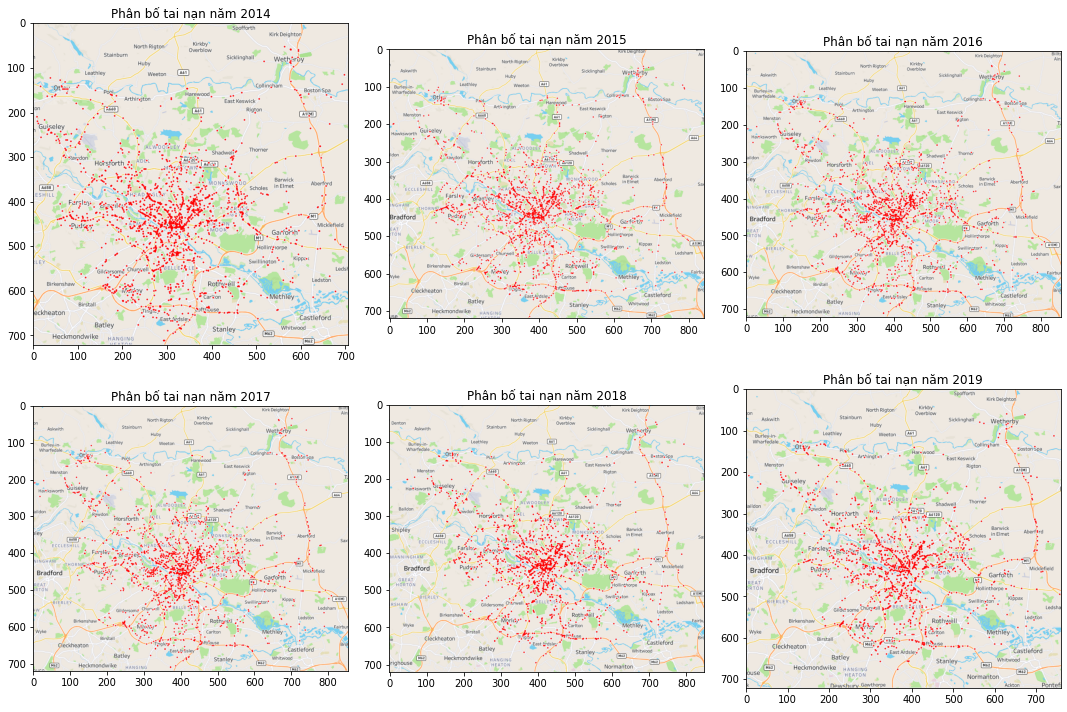

In [7]:
# sử dụng Tableau để trực quan các điểm tai nạn hàng năm theo tọa độ
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,3,figsize=(15,10))
fig.tight_layout()

imgs = []
imgs.append(mpimg.imread('../Data/2014.png'))
imgs.append(mpimg.imread('../Data/2015.png'))
imgs.append(mpimg.imread('../Data/2016.png'))
imgs.append(mpimg.imread('../Data/2017.png'))
imgs.append(mpimg.imread('../Data/2018.png'))
imgs.append(mpimg.imread('../Data/2019.png'))
year = 4
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(imgs[2*i + j])
        axs[i, j].set_title(f'Phân bố tai nạn năm 201{year}')
        year += 1

- Vì các khu vực bị tai nạn trong 6 năm khá giống nhau. Do đó, ta chỉ tập trung phân tích 1 năm.
- Chọn năm 2017 (tôi đang định phân tích sạch, nếu kq giống nhau thì ok)
- Áp dụng thuật toán KMean để phân ra 

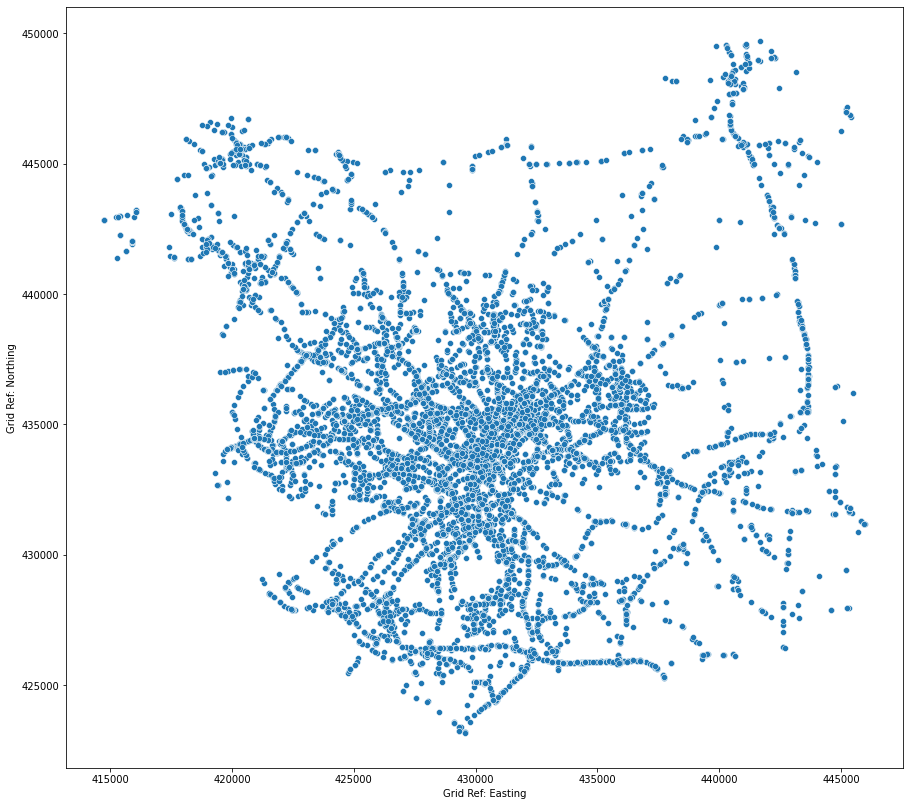

In [10]:
fig, ax = plt.subplots(figsize=(15, 14))
sns.scatterplot(data=df, x='Grid Ref: Easting', y='Grid Ref: Northing', ax=ax)
fig.show()

- Từ bản đồ trên, ta có thể liệt kê tên một vài con đường hoặc một vài địa danh mà ở đó, mật độ tai nạn cao hơn các nơi khác trên bản đồ
    - Đường A1(M)
    - Đường M1
    - Đường M62
    - Đường A660

**Thống kê khung thời gian xảy ra tai nạn trong ngày**


Text(0.5, 1.0, 'So sánh số lượng tai nạn trong các khoảng giờ cao điểm')

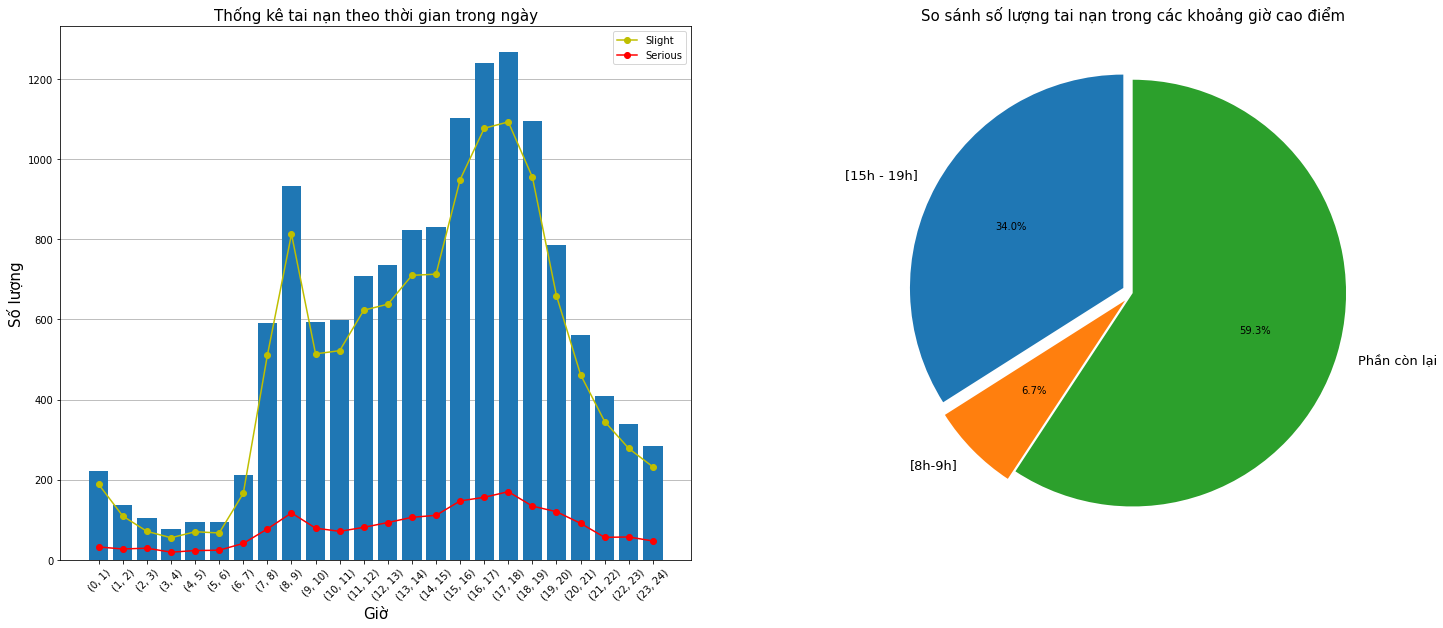

In [11]:
x_axis = makeXAxis(0,1,24)
y_axis = makeYAxis(df['Time (24hr)'].apply(lambda x: int(x[:2]) + int(x[3:5])/60), x_axis)

count1519 = np.sum(y_axis[-9:-5])/np.sum(y_axis)*100
count8 = np.sum(y_axis[8])/np.sum(y_axis)*100
sizePie = [count1519, count8, 100-count1519-count8]
labels = ['[15h - 19h]', '[8h-9h]', 'Phần còn lại']

fig, axs = plt.subplots(1,2, figsize=(20,8))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)

hour = df['Time (24hr)'].apply(lambda x: int(x[0:2]))
serious = dict(df[df['Casualty Severity']=='Serious']['Casualty Severity'].groupby([hour]).count())
fatal = dict(df[df['Casualty Severity']=='Fatal']['Casualty Severity'].groupby([hour]).count())
slight = dict(df[df['Casualty Severity']=='Slight']['Casualty Severity'].groupby([hour]).count())
axs[0].plot(list(slight.keys()), list(slight.values()), '-yo', label='Slight', zorder=10)
axs[0].plot(list(serious.keys()), list(serious.values()), '-ro', label='Serious', zorder=10)
# axs[0].plot(list(fatal.keys()), list(fatal.values()), '-k', label='Fatal', zorder=10)
axs[0].bar([str(i) for i in x_axis], y_axis, zorder=3)
axs[0].set_xticklabels([str(i) for i in x_axis], rotation=45)
axs[0].grid(b=True, zorder=0, axis='y')
axs[0].set_xlabel('Giờ', fontsize=15)
axs[0].set_ylabel('Số lượng', fontsize=15)
axs[0].set_title('Thống kê tai nạn theo thời gian trong ngày', fontsize=15)
axs[0].legend()

explode = (0.05, 0.05, 0)
_,texts,_ = axs[1].pie(sizePie, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[2].set_fontsize(13)
axs[1].set_title('So sánh số lượng tai nạn trong các khoảng giờ cao điểm', fontsize=15)

- Khoảng thời gian cao điểm của tai nạn giao thông trong ngày rơi vào từ 7 giờ đến 20 giờ. Có thể chia ra làm 2 khoảng cao điểm chính:
	- Từ 8h đến 9h: Khoảng thời gian bắt đầu đi làm. Số vụ tai nạn xảy ra trong khoảng thời gian này chiếm 6.7% (~927 vụ) tổng số vụ xảy ra trong 6 năm
	- Từ 15h đến 19h: Khoảng thời gian tan làm, đỉnh điểm rơi vào 1 tiếng đồng hồ từ 16h đến 17h. Trong khoảng thời gian này, số vụ tai nạn chiếm 34% (~4.700 vụ) tổng số vụ tai nạn xảy ra trong 6 năm.
- Mức độ của các vụ tai nạn theo 2 khung giờ này cũng tăng lên
    - Mức độ nhẹ của các vụ tai nạn từ (6h đến 9h) và từ (14h đến 18h) tăng một cách đột biến
    - Mức độ nghiêm trọng trong 2 khoảng thời gian này cũng tăng lên đột ngột
- Do đó, cần chú ý khi tham gia giao thông vào giờ cao điểm.

**Thống kê tai nạn tại các khung giờ của các ngày trong tuần**

Text(0.5, 1.0, 'Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

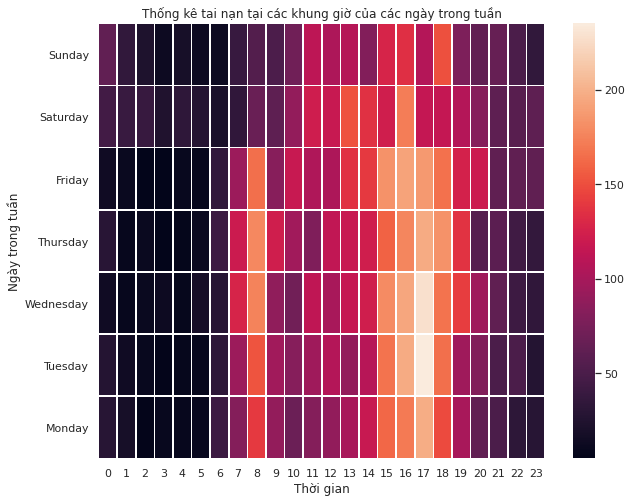

In [12]:
dayOfWeek = pd.to_datetime(df['Accident Date']).dt.dayofweek
map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
dayOfWeek = dayOfWeek.map(map)
hour = df['Time (24hr)'].apply(lambda x: int(x[0:2]))

l_dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
l_dow.reverse()
l_hour = list(range(24))

matrix = np.zeros((len(l_dow), len(l_hour)))

for i in range(len(df)):
    x = l_dow.index(dayOfWeek[i])
    y = l_hour.index(hour[i])
    matrix[x][y] = matrix[x][y] + 1
matrix = matrix.astype('int')
matrix_df = pd.DataFrame(matrix, index = l_dow, columns = l_hour)
sns.set_theme()
plt.figure(figsize=(10,8))
ax = sns.heatmap(matrix_df, linewidths=.5)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

- Nhìn vào biểu đồ trên, ta thấy 2 khoảng giờ cao điểm nêu trên từ thứ 2 đến thứ 6
- Các ngày nghỉ (T7, CN): khoảng cao điểm này không còn rõ nét nữa do số lượng người đi làm vào 2 ngày này giảm đáng kể.

**Liên hệ giữa độ tuổi, giới tính, đối tượng tai nạn và mức độ nghiêm trọng của tai nạn**
- Visualize thống kê theo độ tuổi, giới tính và thống kê theo đối tượng bị tai nạn
- Tìm hiểu mối quan hệ giữa 2 thống kê này

Text(0, 0.5, 'Số vụ')

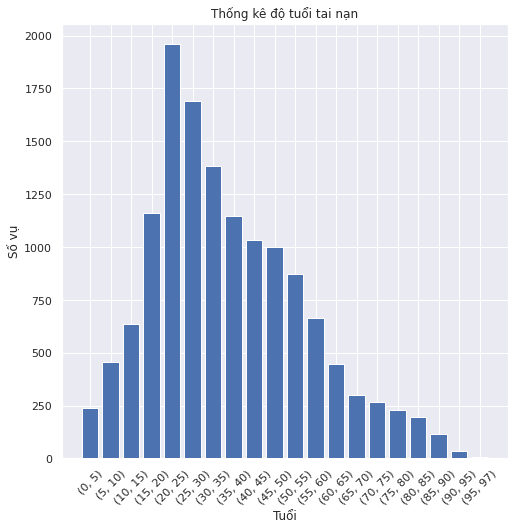

In [13]:
x_axis = makeXAxis(start=0, step=5, end=np.max(df['Age of Casualty']))
y_axis = makeYAxis(df['Age of Casualty'],x_axis)
plt.figure(figsize=(8,8))
plt.xticks(rotation = 45)
plt.bar([str(i) for i in x_axis], y_axis, zorder=3)
plt.grid(b=True, axis='y', zorder=0)
plt.title('Thống kê độ tuổi tai nạn')
plt.xlabel('Tuổi')
plt.ylabel('Số vụ')

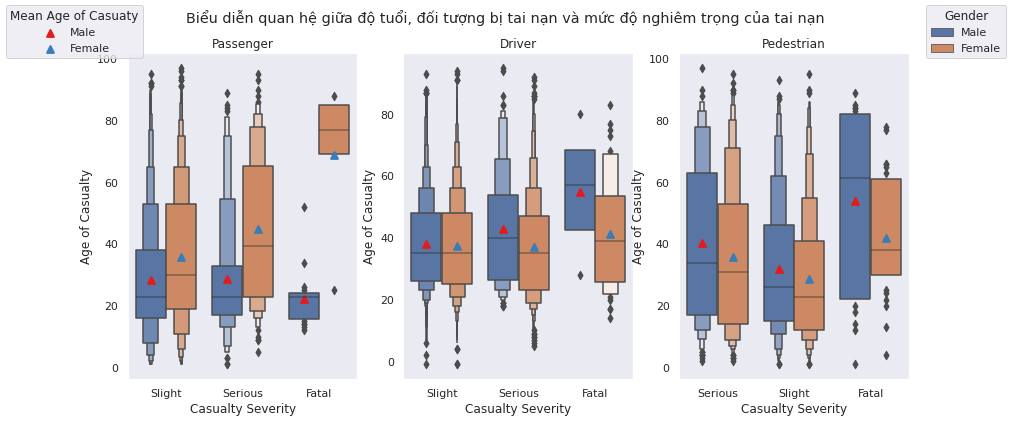

In [23]:
casualty_class = df['Casualty Class'].unique()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Biểu diễn quan hệ giữa độ tuổi, đối tượng bị tai nạn và mức độ nghiêm trọng của tai nạn')
for i in range(len(casualty_class)):
    data_df = df[df['Casualty Class'] == casualty_class[i]]
    sns.boxenplot(data=data_df, x='Casualty Severity', y='Age of Casualty', hue='Sex of Casualty', ax=axes[i])
    sns.pointplot(data=data_df, x='Casualty Severity', y='Age of Casualty', hue='Sex of Casualty',
                  linestyles='None', errwidth=0, dodge=0.4, markers=['^', '^'], palette='Set1', ax=axes[i])
    
    axes[i].get_legend().remove()
    axes[i].set_title(casualty_class[i])
    axes[i].grid(False)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], title='Gender')
fig.legend(handles[2:], labels[2:], title='Mean Age of Casuaty', loc='upper left')

- Quan sát cả 2 biểu đồ trên, có thể kết luận rằng
    - Độ tuổi dễ gây tai nạn giao động từ 15 đến 50.
    - Độ tuổi bị tai nạn trung bình của nữ thấp hơn nam đối với đối tượng bị tai nạn là người điều khiển phương tiện và người đi bộ. Đối với đối tượng là hành khách đi cùng, độ tuổi trung bình của nữ cao hơn nam.
    - Trong đó
        - Đối với đối tượng tai nạn là hành khách đi cùng, nữ chiếm đa số. Do điều kiện sức khoẻ cũng như khả năng phản ứng của nữ thường thấp hơn nam nên số ca nữ thường nhiều hơn và bị thương nặng hơn.
        - Đối với đối tượng tai nạn là người điều khiển phương tiện, tỷ lệ gây tai nạn là như nhau; số ca tử vong của nữ nhiều hơn nam và phân bố từ khoảng 16 đến trên 80 tuổi; độ tuổi từ khoảng 22-58 đối với nữ, 40-68 đối với nam có tỷ lệ tử vong do điều khiển phương tiện cao nhất. Dễ thấy, các đối tượng gây/bị tai nạn đang trong độ tuổi của sự nghiệp. Việc vội vàng trong công việc ở một đất nước như UK là hoàn toàn có thể hiểu được.
        - Đối với người đi bộ, nam giới gây/bị tai nạn nhiều hơn nữ giới. Quan sát đường trung vị ở nam giới tử vong, ta thấy hơn 50% các trường hợp này có độ tuổi trên 60. Do đó, đối tượng nam là người già cần phải chú ý khi tham gia giao thông hoặc khi ra đường, cần có người bảo hộ đi cùng.
    - Đặc biệt, đối với đối tượng tai nạn là người điều khiển phương tiện, xuất hiện các vụ tai nạn với độ tuổi kéo dài từ 0-20 tuổi và mức độ từ nhẹ đến nghiêm trọng. Trong khi độ tuổi được phép lái xe là từ 16 tuổi. Do đó, phụ huynh cần chú ý đến hành vi của trẻ trong độ tuổi này để tránh tai nạn đáng tiếc.

## Rút trích luật từ cây quyết định

- Sử dụng cây quyết định để tìm các luật về mức độ nghiêm trọng khi xảy ra tai nạn. Thuộc tính lớp: `Casualty Severity`. Từ đó xác định được các thuộc tính quan trọng ảnh hưởng đến phân lớp.
- Cây quyết định được setup với chiều cao tối đa là 5, sử dụng độ đo `gini` để phân hoạch.

In [47]:
# encode dữ liệu để đưa vào model
feature_cols = ['Number of Vehicles', 'Time (24hr)', '1st Road Class', 'Road Surface','Lighting Conditions', 'Weather Conditions','Type of Vehicle', 'Casualty Class', 'Sex of Casualty','Age of Casualty']
X = df[feature_cols]        # attributes
X['Time (24hr)'] = X['Time (24hr)'].apply(lambda x: int(x[:2]) + int(x[3:5])/60)
y = df['Casualty Severity'] # class

realValues = {} # lưu lại giá trị thực sau khi encode
numberEncoder = preprocessing.LabelEncoder()
for col in feature_cols[2:9]:
    X[col] = numberEncoder.fit_transform(X[col])
    realValues[col] = numberEncoder.classes_

def evaluate(model, features_testset, targets_testset):
    targets_pred = model.predict(features_testset)
    print(f'Accuracy: {metrics.accuracy_score(targets_testset, targets_pred)}')
    print(classification_report(targets_testset, targets_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Accuracy: 0.8559867042416359
              precision    recall  f1-score   support

       Fatal       0.50      0.03      0.05       111
     Serious       0.78      0.02      0.03      1908
      Slight       0.86      1.00      0.92     11820

    accuracy                           0.86     13839
   macro avg       0.71      0.35      0.34     13839
weighted avg       0.84      0.86      0.79     13839



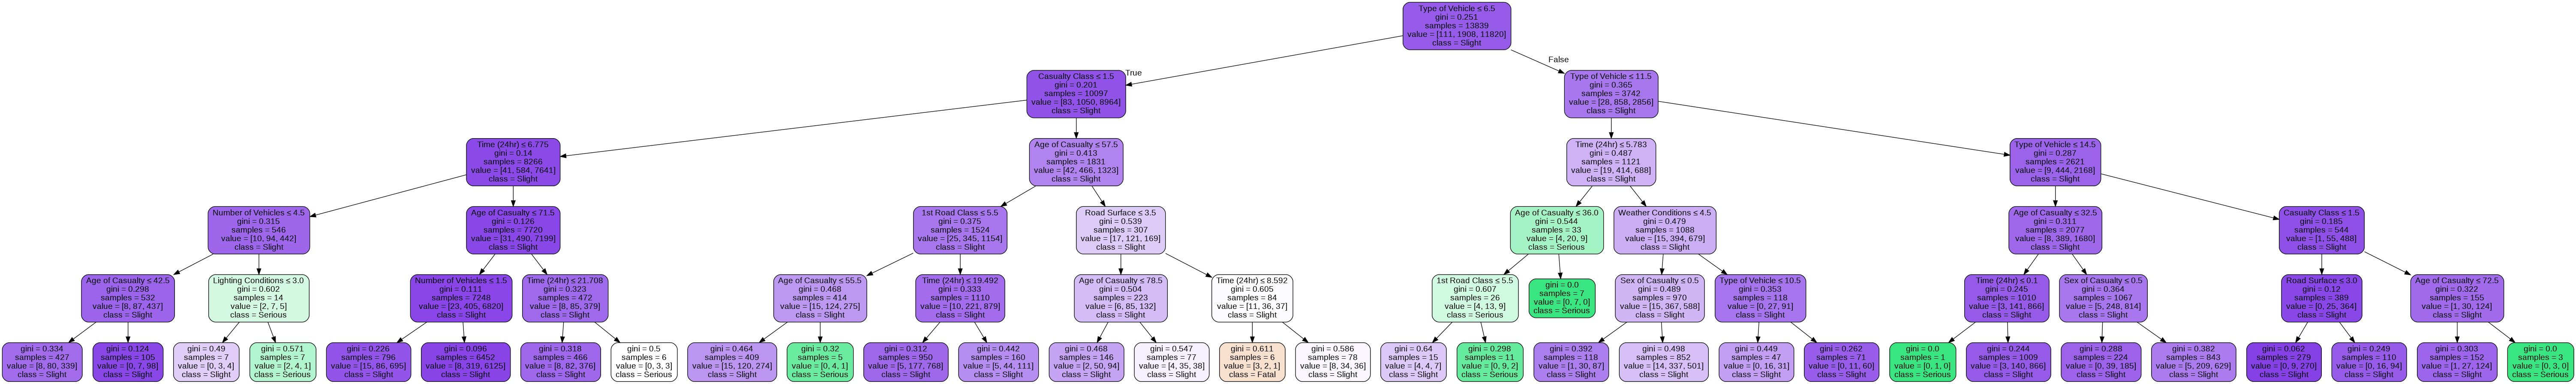

In [63]:
# visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
dt.fit(X, y)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=dt.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rules.png')

evaluate(dt, X, y)
Image(graph.create_png())

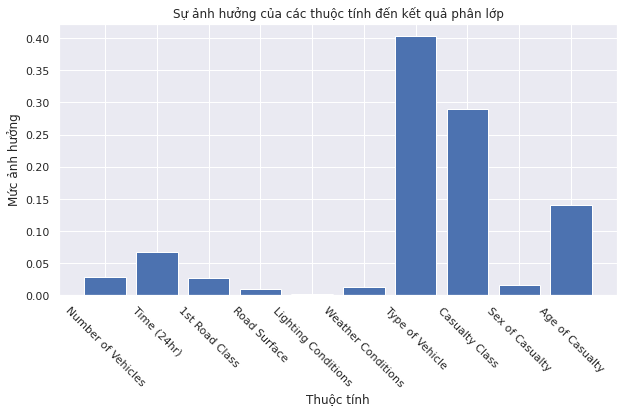

In [64]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, dt.feature_importances_):
    feats[feature] = importance # add the name/value pair 

draw(feats.keys(), feats.values(), title='Sự ảnh hưởng của các thuộc tính đến kết quả phân lớp', x_label='Thuộc tính', y_label='Mức ảnh hưởng',size=(10,5), rotation=-45)

- Từ biểu đồ trên, **các thuộc tính có ảnh hưởng lớn đến mức độ nghiêm trọng của một vụ tai nạn** bao gồm
    - Thời gian tham gia giao thông trong ngày
    - Loại phương tiện sử dụng 
    - Đối tượng tham gia giao thông
    - Độ tuổi tham gia giao thông

## Dự đoán mức độ nghiêm trọng của tai nạn

- Sử dụng Random Forest
- Tìm kiếm bộ tham số tốt nhất
    - Sử dụng kỹ thuật Cross Validation (k = 3 folds)
    - Khởi tạo không gian tìm kiếm
    - Do không gian tìm kiếm lớn, chọn ngẫu nhiên 100 trạng thái trong không gian này để fit với dữ liệu train. Từ đó thu được bộ tham số tốt nhất trong số 100 bộ tham số lấy ngẫu nhiên
- Sử dụng bộ tham số này để dự đoán tập Test và in ra accuracy

In [56]:
# divide train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69) # 70% training and 30% test

In [58]:
# chọn bộ siêu tham số tốt
# tham khảo: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['gini']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2', None]
bootstrap = [True]
params = {'n_estimators': n_estimators,
          'criterion': criterion,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(estimator=rf, n_iter=100, param_distributions=params, cv=3, verbose=2, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 36.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [59]:
print(rf_random_search.best_params_, '\n\n')
best_randomSearch_rf = rf_random_search.best_estimator_
evaluate(best_randomSearch_rf, X_test, y_test)

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True} 


Accuracy: 0.8516377649325626
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00        34
     Serious       0.24      0.01      0.01       575
      Slight       0.85      1.00      0.92      3543

    accuracy                           0.85      4152
   macro avg       0.36      0.33      0.31      4152
weighted avg       0.76      0.85      0.79      4152



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# vét cạn
n_estimators = [1100,1250,1300]
max_features = ['log2']
max_depth = [3,5,8]
min_samples_split = [3,7,8]
min_samples_leaf = [5,8,10]
bootstrap = [True]
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = -1)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 14.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [61]:
print(rf_grid_search.best_params_, '\n\n')
best_gridSearch_rf = rf_grid_search.best_estimator_
evaluate(best_gridSearch_rf, X_test, y_test)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 1300} 


Accuracy: 0.853082851637765
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00        34
     Serious       0.00      0.00      0.00       575
      Slight       0.85      1.00      0.92      3543

    accuracy                           0.85      4152
   macro avg       0.28      0.33      0.31      4152
weighted avg       0.73      0.85      0.79      4152



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
